<img src = "./image/image.png" width=100% heigth=200px ><br>
# <center> Employee Attrition </center>

# Introduction<br>
Employee attrition is a critical aspect of human resource management, representing the departure of employees from an organization. Understanding and predicting attrition can aid in strategic workforce planning and retention efforts. This comprehensive documentation outlines the entire process of analyzing employee attrition using a dataset, encompassing data preprocessing, visualization, and the implementation of various machine learning models.

In [58]:
# Importing libraries
import pandas as pd, numpy as np, seaborn as sns, plotly.express as px, matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [59]:
# Plot Customization
plt.figure(figsize = (15,9))
plt.style.context('bmh')

<Figure size 1500x900 with 0 Axes>

Reading Data

In [60]:
# Loading dataset
df = pd.read_csv('data.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Show data set information

In [61]:
print(f'The dataset has {df.shape[0]} rows for each employee and {df.shape[1]} attributes\n')

The dataset has 1470 rows for each employee and 35 attributes



CLEANING DATA SET

1. Dropped columns with more than 90.0% empty values

In [62]:
# Assuming df is your DataFrame
threshold = 0.8  # Set the threshold for empty values (NaN)

# Calculate the threshold for number of non-NaN values
num_threshold = int((1 - threshold) * len(df))

# Drop columns with more NaN values than the threshold
df_cleaned = df.dropna(axis=1, thresh=num_threshold)

# Print the columns that were dropped
dropped_columns = set(df.columns) - set(df_cleaned.columns)
print(f"Dropped columns with more than {threshold * 100}% empty values: {dropped_columns}")

# Display the shape of the cleaned DataFrame
print("Cleaned DataFrame shape:", df_cleaned.shape)

# df_cleaned now contains the DataFrame with columns having less than the specified threshold of empty values


Dropped columns with more than 80.0% empty values: set()
Cleaned DataFrame shape: (1470, 35)


2. Encode categorical columns

In [63]:
df.dtypes.head()

Age                int64
Attrition         object
BusinessTravel    object
DailyRate          int64
Department        object
dtype: object

In [64]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
encoder = LabelEncoder()
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda col: encoder.fit_transform(col.astype(str)))

In [65]:
df.dtypes.head()

Age               int64
Attrition         int32
BusinessTravel    int32
DailyRate         int64
Department        int32
dtype: object

3. Create Gaussian distribution and remove unneseccery attributes

c:\Users\mjdar\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:1983: RuntimeWarning:

divide by zero encountered in divide



c:\Users\mjdar\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:1983: RuntimeWarning:

divide by zero encountered in divide

c:\Users\mjdar\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:1983: RuntimeWarning:

divide by zero encountered in divide



Excluded attributes with std < 0.8: ['EmployeeCount', 'Over18', 'StandardHours']


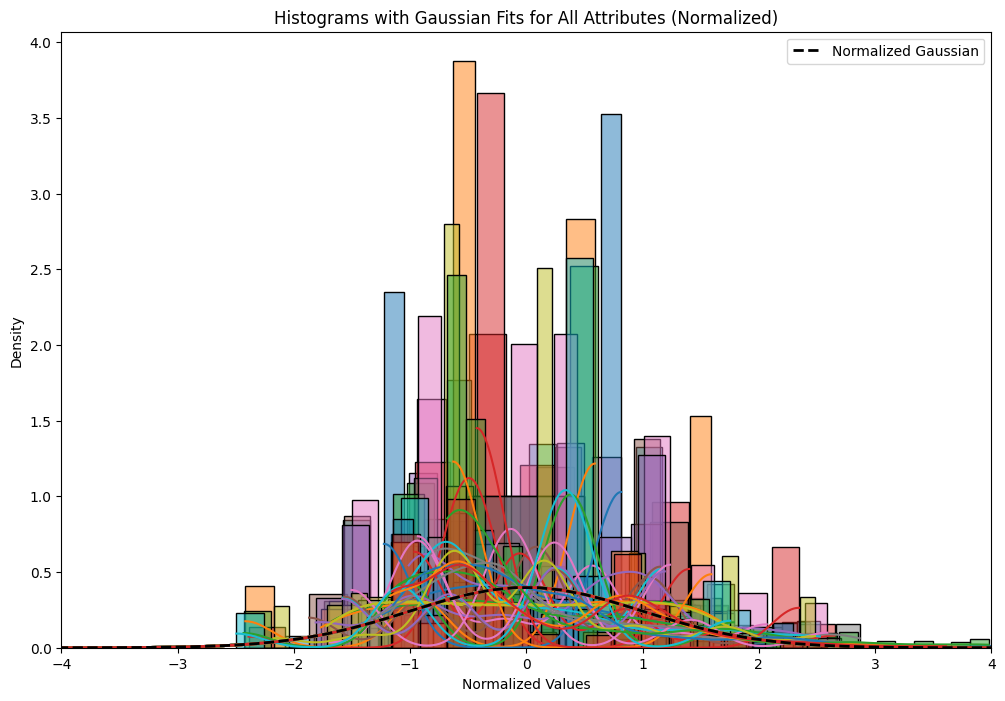

(1470, 31)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-1.701283,-0.660531,-1.224745,...,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,1
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,-1.699621,0.254625,0.816497,...,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,0
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,-1.696298,1.169781,0.816497,...,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,1
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,-1.694636,1.169781,-1.224745,...,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,0
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.691313,-1.575686,0.816497,...,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0


In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

attrition_column = df['Attrition']

# Drop 'Attrition' column from the DataFrame before normalization
df = df.drop(columns=['Attrition'])

# Copy the original DataFrame for comparison
df_original = df.copy()
# Normalize all data using StandardScaler and overwrite the original DataFrame
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# List to store attributes to be excluded
exclude_attributes = []

# Loop through all columns (attributes) and create histograms with Gaussian fits
for attribute in df.columns:
    # Create a histogram
    sns.histplot(df[attribute], kde=True, stat='density',)

    # Fit a Gaussian distribution to the normalized data
    mu, std = norm.fit(df[attribute])
    xmin, xmax = plt.xlim()
    x = np.linspace(-4, 4, 100)  # Set x-axis range from -4 to 4
    p = norm.pdf(x, mu, std)

    # Plot the Gaussian fit for the normalized data
    plt.plot(x, p, linewidth=2)

    # Check if the standard deviation is below the threshold (0.8)
    if std < 0.8:
        exclude_attributes.append(attribute)    

# Plot the Gaussian distribution for normalized data (mean=0, std=1)
x_norm = np.linspace(-10, 10, 100)
p_norm = norm.pdf(x_norm, 0, 1)
plt.plot(x_norm, p_norm, 'k--', linewidth=2, label='Normalized Gaussian')

# Drop excluded attributes from the original DataFrame 'df'
df.drop(exclude_attributes, axis=1, inplace=True)

# Display excluded attributes
print(f"Excluded attributes with std < 0.8: {exclude_attributes}")

plt.title('Histograms with Gaussian Fits for All Attributes (Normalized)')
plt.xlabel('Normalized Values')
plt.ylabel('Density')
plt.xlim(-4, 4)  # Set x-axis limits from -10 to 10
plt.legend()
plt.show()

# Print the shape of the filtered DataFrame
print(df.shape)

df['Attrition'] = attrition_column

df.head()


*JobLevel* doesn't have a description containing its values, so I'll leave them numeric, just as they've been originally collected.

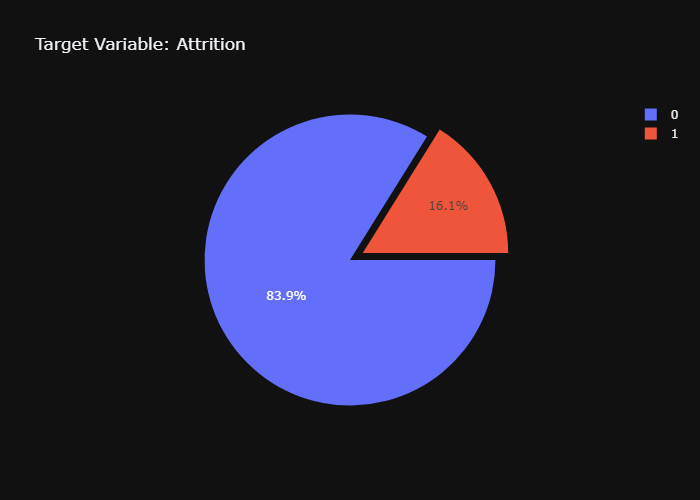

In [74]:
# Visualizing target variable classes and its distribution among the dataset
fig = px.pie(df, names = 'Attrition', title = 'Target Variable: Attrition', template = 'plotly_dark')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent",)
fig.show('png')


PCA Feature Extraction With Variance


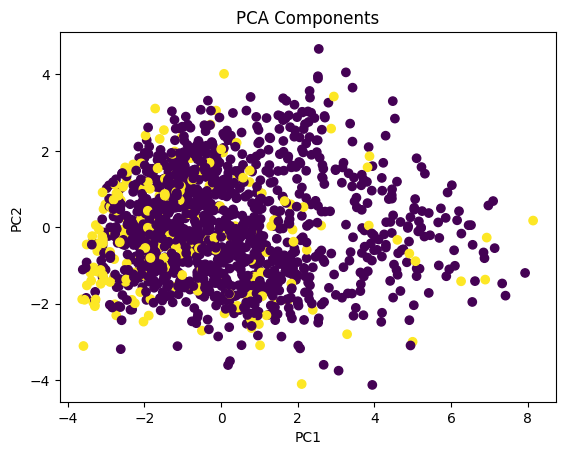

In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = df['Attrition']
X = df.drop('Attrition', axis=1)

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Encoding categorical features for PCA
# Handle categorical variables appropriately
y = encoder.fit_transform(y)

# Applying PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X_standardized)

# Creating a new DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Attrition'] = y

# Accessing mean, covariance matrix, eigenvalues, and eigenvectors
mean_values = pca.mean_
covariance_matrix = pca.get_covariance()
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
eigenvectors = pca.components_

# Print or use the results as needed
# print("Mean Values:", mean_values)
# print("Covariance Matrix:\n", covariance_matrix)
# print("Explained Variance:", explained_variance)
# print("Explained Variance Ratio:", explained_variance_ratio)
# print("Eigenvectors:\n", eigenvectors)

# Visualizing the PCA components
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Attrition'], cmap='viridis')
plt.title('PCA Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing and applying PCA on training set
X_train_standardized = scaler.transform(X_train)
X_train_pca = pca.transform(X_train_standardized)

# Standardizing and applying PCA on testing set
X_test_standardized = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_standardized)

In [76]:
def show_confu(y_test_pred, model):
    # Create a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred) * 100))
    
    # Set zero_division=1 to avoid the warning and consider precision, recall, and F1 as 0 when no predicted samples.
    print('Precision: %.2f%%' % (precision_score(y_test, y_test_pred, zero_division=1) * 100))
    print('Recall: %.2f%%' % (recall_score(y_test, y_test_pred, zero_division=1) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y_test, y_test_pred, zero_division=1) * 100))
    
    confusion_matrix_model = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    plt.show()

Mean-Shift

Accuracy: 86.17%
Precision: 100.00%
Recall: 0.00%
F1_Score: 0.00%


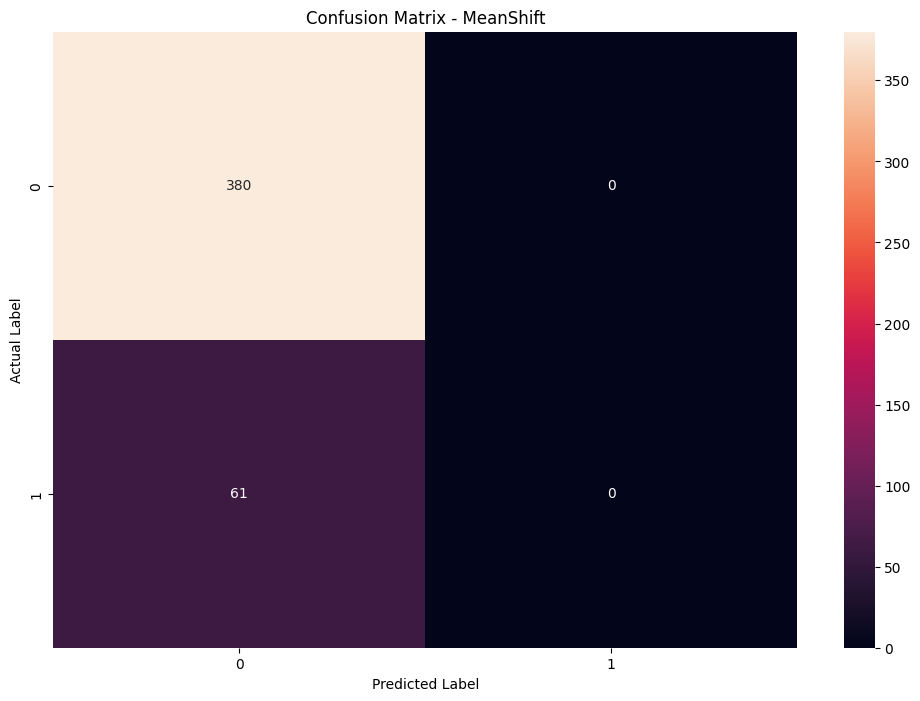

In [77]:
from sklearn.cluster import MeanShift
# Create a MeanShift classifier
mean_shift_classifier = MeanShift()

# Train the MeanShift classifier on the PCA-transformed features
mean_shift_classifier.fit(X_train_pca)

# Predictions on the test set
y_test_pred = mean_shift_classifier.predict(X_test_pca)

# This example demonstrates how to use Mean Shift; however, accuracy might not be the most suitable metric.
unique_labels = np.unique(y_test_pred)
num_clusters = len(unique_labels)
cluster_dict = {unique_labels[i]: i for i in range(num_clusters)}
mapped_labels = [cluster_dict[label] for label in y_test_pred]
show_confu(y_test_pred,'MeanShift')

Knn

Accuracy: 78.68%
Precision: 17.65%
Recall: 14.75%
F1_Score: 16.07%


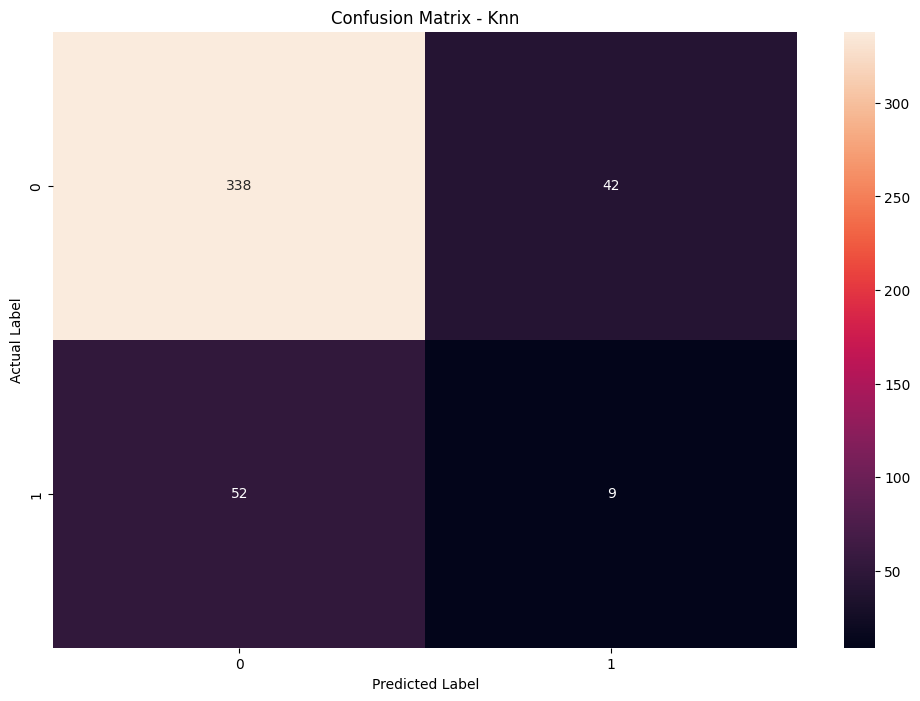

In [78]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the PCA-transformed features
knn_classifier.fit(X_train_pca, y_train)

# Predictions on the test set
y_test_pred = knn_classifier.predict(X_test_pca)

# Evaluate the accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
show_confu(y_test_pred,'Knn')

Svm

Accuracy: 86.17%
Precision: 100.00%
Recall: 0.00%
F1_Score: 0.00%


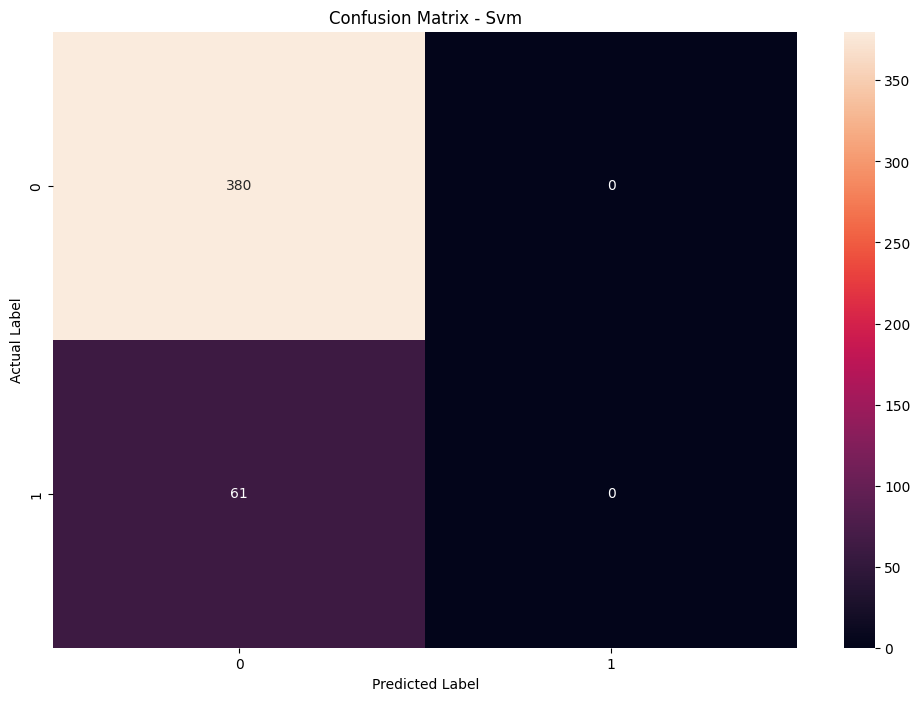

In [79]:
from sklearn.svm import SVC
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM classifier on the PCA-transformed features
svm_classifier.fit(X_train_pca, y_train)

# Predictions on the test set
y_test_pred = svm_classifier.predict(X_test_pca)

# Evaluate the accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
show_confu(y_test_pred,'Svm')

K Means

Desion Tree

Accuracy: 86.17%
Precision: 100.00%
Recall: 0.00%
F1_Score: 0.00%


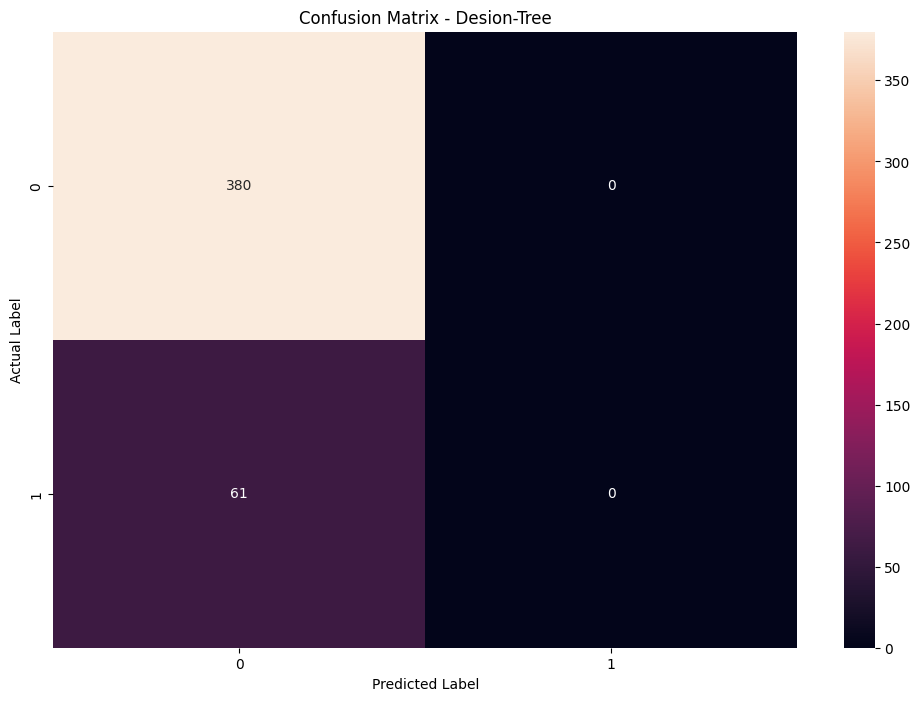

In [80]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the decision tree model on the PCA-transformed features
tree_classifier.fit(X_train_pca, y_train)

# Predictions on the test set
y_pred = tree_classifier.predict(X_test_pca)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
show_confu(y_test_pred,'Desion-Tree')